In [2]:
import pandas as pd
import requests
import numpy as np
import json
from bs4 import BeautifulSoup as bs
import random
import time
import json
import pickle

In [95]:
with open("listas_usuarios_5.pickle", "rb") as archivo:
    listas = pickle.load(archivo)

In [96]:
gran_df = pd.DataFrame()
for user_id, value in listas.items():
    name = value.pop("nombre")
    value = {x[0]: x[1][0] for x in value.items() if (x[1][1] == 2) and (x[1][0] > 0)}
    if len(value) == 0:
        continue
    dato = {f"{user_id}:{name}": value}
    dato_df = pd.DataFrame.from_dict(dato, orient='columns')
    gran_df = pd.concat([gran_df, dato_df], axis=1)

In [97]:
pd.set_option('display.max_rows', 100)
gran_df

,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4228955:kainoa13912,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower
30,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
47,5.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
15785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [98]:
gran_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4741 entries, 30 to 696
Columns: 578 entries, 3754155:Kazaaj to 3511913:kstinasunflower
dtypes: float64(578)
memory usage: 20.9 MB


In [99]:
# It is better to make this dataframe a sparse one
gran_df_sparse = gran_df.astype(pd.SparseDtype(np.float64, fill_value=np.nan))
gran_df_sparse.dtypes
gran_df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4741 entries, 30 to 696
Columns: 578 entries, 3754155:Kazaaj to 3511913:kstinasunflower
dtypes: Sparse[float64, nan](578)
memory usage: 627.8 KB


In [80]:
del gran_df

In [100]:
gran_df_sparse

,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4228955:kainoa13912,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower
30,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
47,5.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
15785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [82]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'N° Usuarios que dieron review - N° Usuarios')

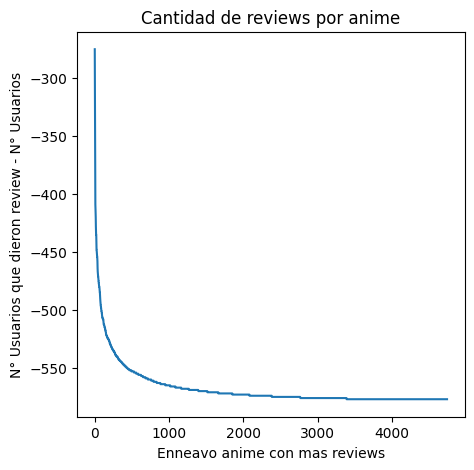

In [58]:
# Parcialmente inspirado en:
# https://stackoverflow.com/questions/45909776/sort-rows-of-a-dataframe-in-descending-order-of-nan-counts
serie_null = gran_df_sparse.isnull().sum(axis=1).mul(-1)
serie_null.sort_values(ascending=False, inplace=True)
serie_null.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 5))
plt.plot(serie_null)
plt.title("Cantidad de reviews por anime")
plt.xlabel("Enneavo anime con mas reviews",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 10})
plt.ylabel("N° Usuarios que dieron review - N° Usuarios",
           fontdict={"fontsize": 10})

Text(0, 0.5, 'N° reviews por usuario - N° animes')

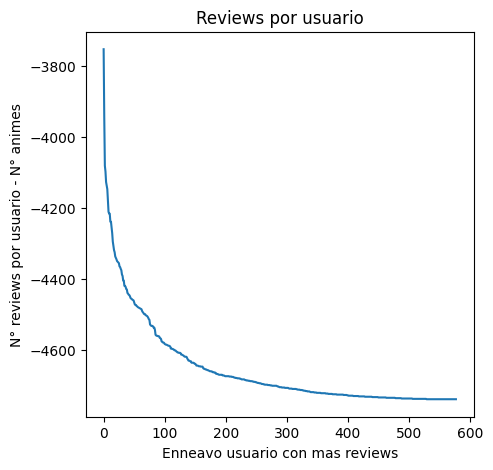

In [62]:
# Parcialmente inspirado en:
# https://stackoverflow.com/questions/45909776/sort-rows-of-a-dataframe-in-descending-order-of-nan-counts
serie_null = gran_df_sparse.isnull().sum(axis=0).mul(-1)
serie_null.sort_values(ascending=False, inplace=True)
serie_null.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 5))
plt.plot(serie_null)
plt.title("Reviews por usuario")
plt.xlabel("Enneavo usuario con mas reviews",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 10})
plt.ylabel("N° reviews por usuario - N° animes",
           fontdict={"fontsize": 10})

In [101]:
gran_df_sparse.isnull().sum(axis=1).mul(-1)

30      -455
47      -519
71      -546
72      -554
170     -558
        ... 
2451    -577
8491    -577
15785   -577
2471    -577
696     -577
Length: 4741, dtype: int32

In [102]:
gran_df_sparse["dif"] = gran_df_sparse.isnull().sum(axis=1).mul(-1)

In [103]:
gran_df_sparse

,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower,dif
30,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,-455
47,5.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-519
71,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-546
72,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-554
170,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
8491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,-577
15785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,-577
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,-577


In [106]:
gran_df_sparse.sort_values(by="dif", ascending=False, axis=0)


,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower,dif
16498,NaN,10.0,NaN,8.0,7.0,9.0,NaN,NaN,10.0,9.0,...,NaN,9.0,9.0,NaN,NaN,8.0,NaN,NaN,NaN,-275
11757,3.0,10.0,NaN,NaN,NaN,9.0,NaN,NaN,8.0,NaN,...,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,-295
1535,6.0,10.0,NaN,8.0,NaN,10.0,NaN,10.0,9.0,9.0,...,8.0,9.0,8.0,NaN,NaN,9.0,NaN,NaN,NaN,-315
5114,7.0,10.0,NaN,8.0,NaN,10.0,9.0,10.0,9.0,9.0,...,NaN,10.0,NaN,NaN,NaN,NaN,9.0,10.0,NaN,-362
19815,NaN,10.0,NaN,NaN,NaN,9.0,NaN,NaN,7.0,NaN,...,NaN,9.0,9.0,NaN,NaN,9.0,NaN,NaN,NaN,-381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
1409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
14653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
14117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
